# Web Scrapping

In [3]:
!pip install selenium


   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.7 MB 4.5 MB/s eta 0:00:03
    --------------------------------------- 0.1/9.7 MB 2.1 MB/s eta 0:00:05
    --------------------------------------- 0.2/9.7 MB 2.0 MB/s eta 0:00:05
   - -------------------------------------- 0.3/9.7 MB 1.9 MB/s eta 0:00:05
   - -------------------------------------- 0.4/9.7 MB 2.0 MB/s eta 0:00:05
   -- ------------------------------------- 0.5/9.7 MB 1.9 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/9.7 MB 2.0 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/9.7 MB 1.9 MB/s eta 0:00:05
   -- ------------------------------------- 0.7/9.7 MB 1.8 MB/s eta 0:00:05
   --- ------------------------------------ 0.8/9.7 MB 1.8 MB/s eta 0:00:05
   --- ------------------------------------ 0.9/9.7 MB 1.9 MB/s eta 0:00:05
   ---- ----------------------------------- 1.0/9.7 MB 1.9 MB/s eta 0:00:05
   ---- -----------

In [24]:
!pip install webdriver-manager


In [1]:
#Import Packages
from selenium import webdriver
import time
import pandas as pd
import os

In [3]:
import csv

In [5]:
#Import Packages

from selenium.webdriver.support.select import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC

In [7]:


url1='https://www.linkedin.com/jobs/search/?currentJobId=4029490581&f_E=2&geoId=101174742&keywords=data%20analyst&origin=JOB_SEARCH_PAGE_JOB_FILTER&refresh=true&spellCorrectionEnabled=true'

In [43]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

# Automatically manage the ChromeDriver version that matches your browser
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)

driver.implicitly_wait(10)
driver.get(url1)  # Ensure `url1` is defined earlier
time.sleep(5)  # Allow time for the page to load



In [47]:
# List to hold job data
job_data = []

# Wait until the job titles, company names, and locations are loaded
wait = WebDriverWait(driver, 10)

# Extract job titles, company names, and locations from the first page
job_titles = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME, 'base-search-card__title')))
company_names = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME, 'base-search-card__subtitle')))
locations = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME, 'job-search-card__location')))

# Iterate through each job and extract text
for job_title, company_name, location in zip(job_titles, company_names, locations):
    job_data.append({
        'Job Title': job_title.text,
        'Company Name': company_name.text,
        'Location': location.text
    })

# Convert the job data to a DataFrame
df = pd.DataFrame(job_data)

# Save the DataFrame to a CSV file
df.to_csv('linkedin_first_page_jobs.csv', index=False, encoding='utf-8')

# Print the DataFrame to see the results
df.head()


,Job Title,Company Name,Location
0,Data Analyst,HelloFresh,"Toronto, Ontario, Canada"
1,Data Analyst,New Wave Financial,"Greater Toronto Area, Canada"
2,Data Analyst,UST,"Toronto, Ontario, Canada"
3,"Data Analyst, Medical - Remote",Aurora Cannabis Inc.,"Alberta, Canada"
4,Data Analyst,CGI,"Edmonton, Alberta, Canada"


In [49]:
df.tail()

,Job Title,Company Name,Location
115,Data Engineer,"REPAIRIFY, INC.",Greater St. John's Metropolitan Area
116,Data Analytical Specialist - Senior,Global Pharma Tek,"Toronto, Ontario, Canada"
117,Online Data Analyst,TELUS Digital AI Data Solutions,"Spruce Grove, Alberta, Canada"
118,Online Data Analyst,TELUS Digital,"Roussillon Regional County Municipality, Quebe..."
119,Online Data Analyst,TELUS Digital AI Data Solutions,"Calgary, Alberta, Canada"


In [53]:
# Close the driver
driver.quit()

print(f"Data extracted and saved to linkedin_jobs.csv. Total jobs found: {len(job_data)}")

Data extracted and saved to linkedin_jobs.csv. Total jobs found: 120


# Data Analysis

In [58]:
# Display the first few rows to inspect the data
print(df.head())

                        Job Title          Company Name  \
0                    Data Analyst            HelloFresh   
1                    Data Analyst    New Wave Financial   
2                    Data Analyst                   UST   
3  Data Analyst, Medical - Remote  Aurora Cannabis Inc.   
4                    Data Analyst                   CGI   

                       Location  
0      Toronto, Ontario, Canada  
1  Greater Toronto Area, Canada  
2      Toronto, Ontario, Canada  
3               Alberta, Canada  
4     Edmonton, Alberta, Canada  


In [60]:
# Get a quick summary of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Job Title     120 non-null    object
 1   Company Name  120 non-null    object
 2   Location      120 non-null    object
dtypes: object(3)
memory usage: 2.9+ KB
None


In [62]:
# Check for missing values
print(df.isnull().sum())

Job Title       0
Company Name    0
Location        0
dtype: int64


In [78]:
unique_locations = df['Location'].unique()
print(f"Unique Locations: {len(unique_locations)}")
print(unique_locations)


Unique Locations: 43
['Toronto, Ontario, Canada' 'Greater Toronto Area, Canada'
 'Alberta, Canada' 'Edmonton, Alberta, Canada'
 'Mississauga, Ontario, Canada' 'North York, Ontario, Canada'
 'Saint-Laurent, Manitoba, Canada' 'Canada'
 'North Vancouver, British Columbia, Canada' 'Calgary, Alberta, Canada'
 'St Thomas, Ontario, Canada' 'Newmarket, Ontario, Canada'
 'Burnaby, British Columbia, Canada' 'Ontario, Canada'
 'Vancouver, British Columbia, Canada' 'Scarborough, Ontario, Canada'
 'Montreal, Quebec, Canada' 'Dollard-des-Ormeaux, Quebec, Canada'
 'Halifax, Nova Scotia, Canada' 'Saint John, New Brunswick, Canada'
 'Greater Calgary Metropolitan Area' 'Acheson, Alberta, Canada'
 'Strathroy, Ontario, Canada' 'Hamilton, Ontario, Canada'
 'Drummondville, Quebec, Canada' 'Winnipeg, Manitoba, Canada'
 'Saint-Eustache, Quebec, Canada' 'Victoriaville, Quebec, Canada'
 'Terrebonne, Quebec, Canada' 'Magog, Quebec, Canada'
 'St-Hyacinthe, Quebec, Canada' 'Stoney Creek, Ontario, Canada'
 'London,

In [82]:
# Split 'Location' column into City and State/Province, removing 'Canada'
df[['City', 'State']] = df['Location'].apply(lambda x: pd.Series(x.split(',')[:-1]))

# Verify the results by displaying the first few rows
print(df[['City', 'State']].head(10))


                   City     State
0               Toronto   Ontario
1  Greater Toronto Area       NaN
2               Toronto   Ontario
3               Alberta       NaN
4              Edmonton   Alberta
5           Mississauga   Ontario
6               Toronto   Ontario
7              Edmonton   Alberta
8            North York   Ontario
9               Toronto   Ontario


In [84]:
print(df.isnull().sum())

Job Title        0
Company Name     0
Location         0
City, State      0
City             6
State           12
dtype: int64


In [86]:
df_cleaned = df.dropna()

In [136]:

# Check if there are still missing values
print(df_cleaned.isnull().sum())

Job Title       0
Company Name    0
Location        0
City, State     0
City            0
State           0
dtype: int64


In [140]:
# Create a copy of the DataFrame
df_cleaned = df.copy()


In [156]:

# Check if there are still missing values
print(df_cleaned.isnull().sum())

Job Title        0
Company Name     0
City             6
State           12
dtype: int64


In [154]:
# Drop the 'Location' column in-place
df_cleaned.drop(columns=['City, State'], inplace=True)


In [158]:
df_cleaned = df.dropna()

In [160]:
# Check if there are still missing values
print(df_cleaned.isnull().sum())

Job Title       0
Company Name    0
City, State     0
City            0
State           0
dtype: int64


# Overview of the Data

In [91]:
# Most common job titles
print("Top 5 most common job titles:")
print(df['Job Title'].value_counts().head(5))

# Most common companies
print("\nTop 5 most common companies:")
print(df['Company Name'].value_counts().head(5))

# Most common cities
print("\nTop 5 most common cities:")
print(df['City'].value_counts().head(5))

# Most common states
print("\nTop 5 most common states:")
print(df['State'].value_counts().head(5))


Top 5 most common job titles:
Job Title
Data Analyst                                15
Online Data Analyst                         12
Data Engineer                                7
Business Intelligence Analyst                6
Data Analyst, Investment Data Management     3
Name: count, dtype: int64

Top 5 most common companies:
Company Name
BCJobs                             8
TELUS Digital                      7
TELUS Digital AI Data Solutions    5
Longbow Advantage                  4
Tek Tron IT                        4
Name: count, dtype: int64

Top 5 most common cities:
City
Toronto        27
Vancouver      14
Calgary        10
Montreal        8
Mississauga     7
Name: count, dtype: int64

Top 5 most common states:
State
Ontario             49
Alberta             19
Quebec              19
British Columbia    16
Manitoba             2
Name: count, dtype: int64


# Distribution of Job Postings by City

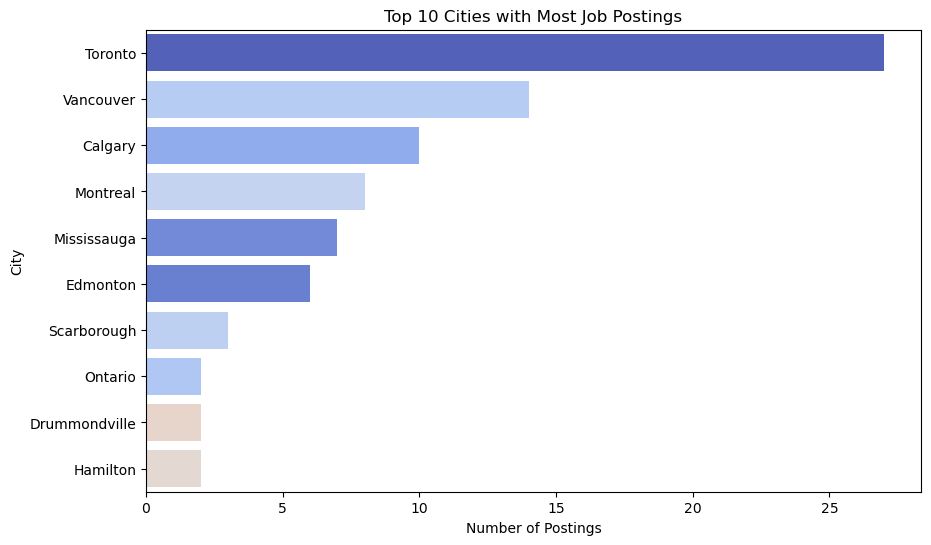

In [100]:
# Plot distribution of job postings by city
plt.figure(figsize=(10, 6))
sns.countplot(y='City', data=df, order=df['City'].value_counts().index[:10], palette='coolwarm', hue='City', legend=False)
plt.title('Top 10 Cities with Most Job Postings')
plt.xlabel('Number of Postings')
plt.ylabel('City')
plt.show()


# Distribution of Job Postings by State

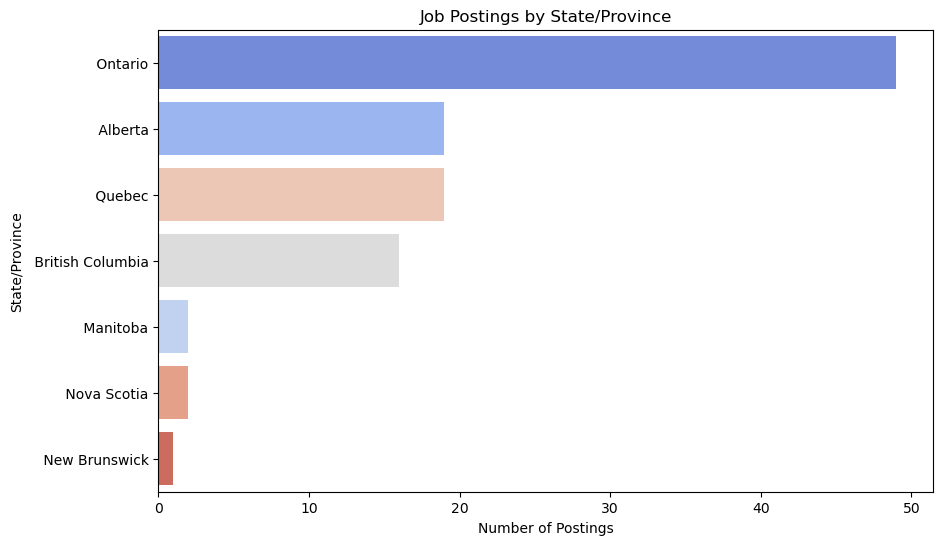

In [104]:
# Plot distribution of job postings by state
plt.figure(figsize=(10, 6))
sns.countplot(y='State', data=df, order=df['State'].value_counts().index, palette='coolwarm', hue='State', legend=False)
plt.title('Job Postings by State/Province')
plt.xlabel('Number of Postings')
plt.ylabel('State/Province')
plt.show()


# Top Companies with Most Job Postings

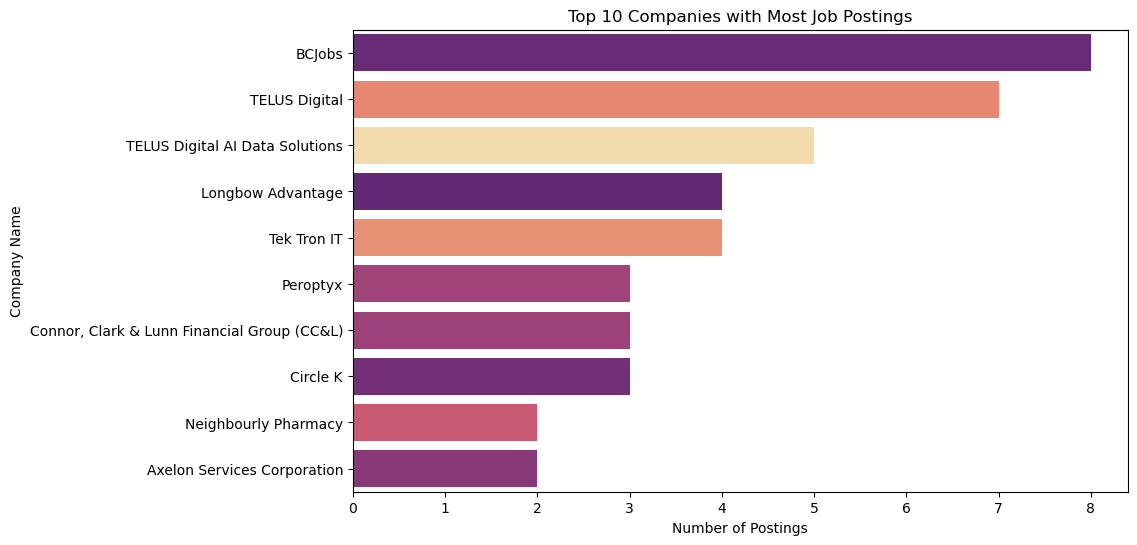

In [108]:
# Plot the companies with most job postings
plt.figure(figsize=(10, 6))
sns.countplot(y='Company Name', data=df, order=df['Company Name'].value_counts().index[:10], palette='magma', hue='Company Name', legend=False)
plt.title('Top 10 Companies with Most Job Postings')
plt.xlabel('Number of Postings')
plt.ylabel('Company Name')
plt.show()


# Heatmap of Job Titles vs Locations

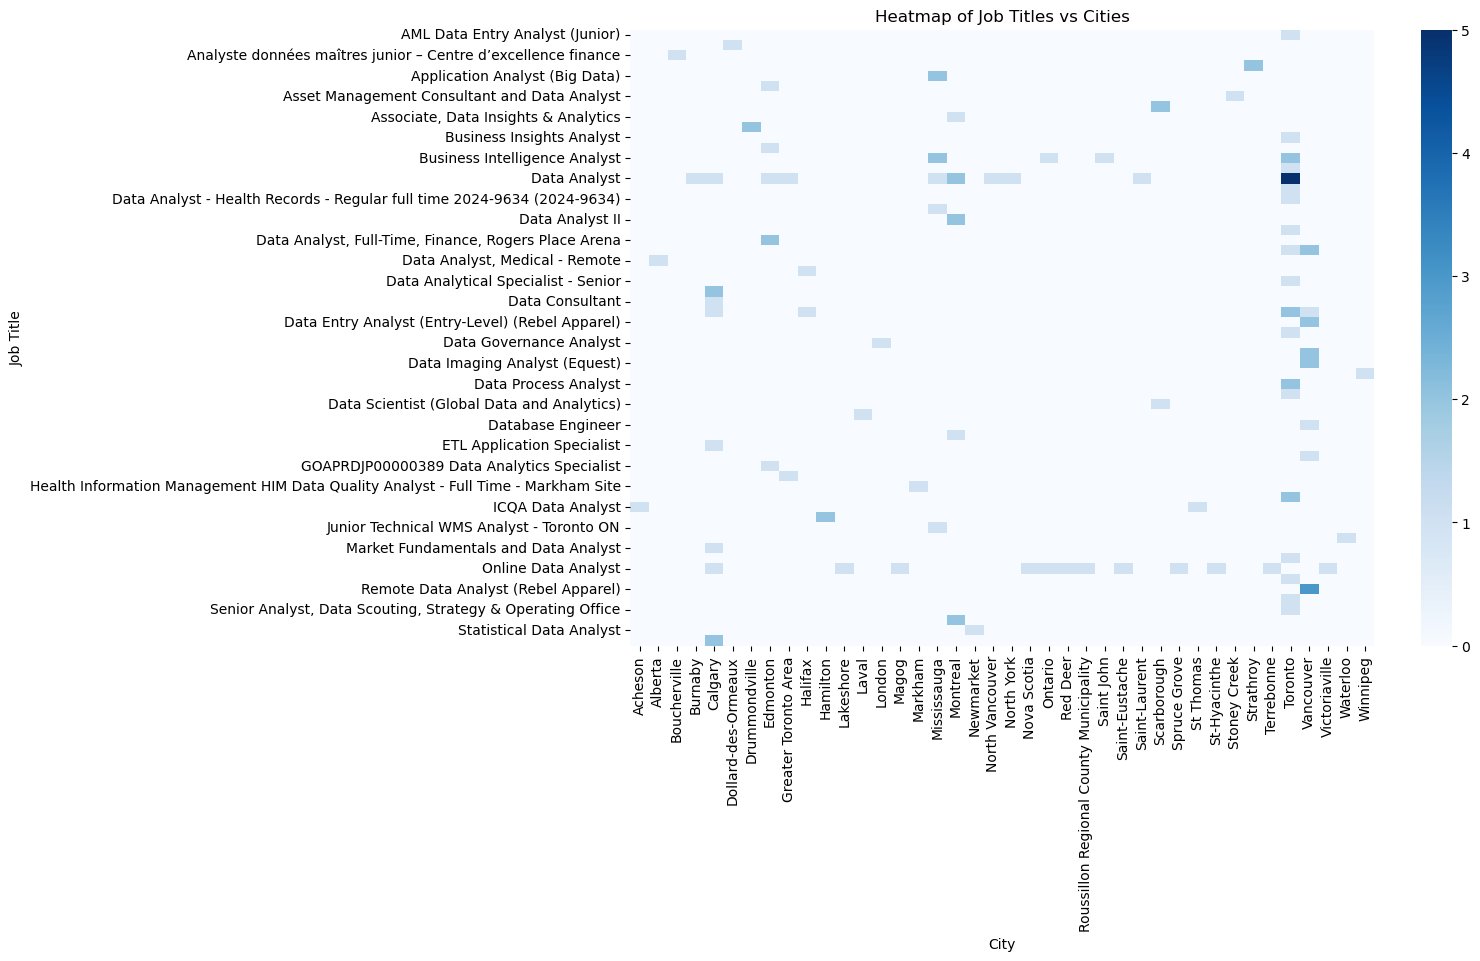

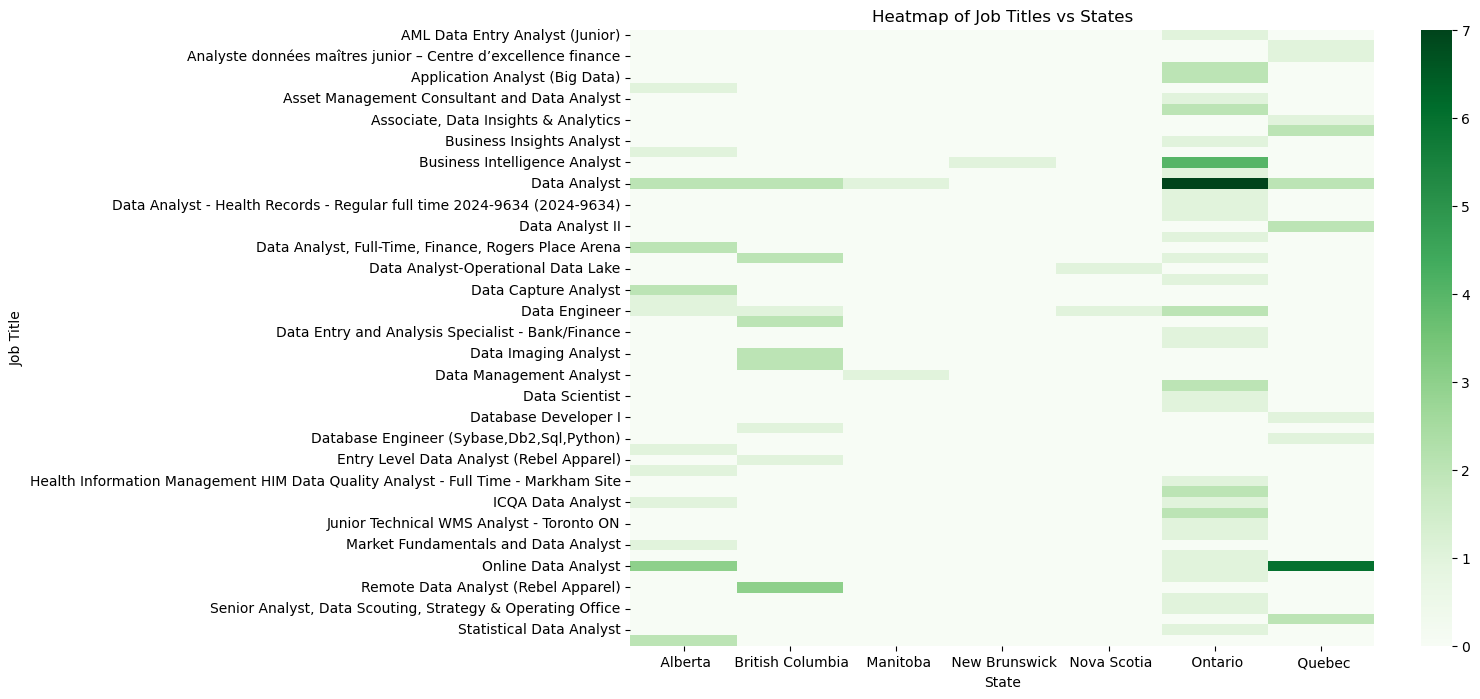

In [114]:
# Heatmap for job title vs city
plt.figure(figsize=(12, 8))
sns.heatmap(job_city_crosstab, cmap='Blues')
plt.title('Heatmap of Job Titles vs Cities')
plt.xlabel('City')
plt.ylabel('Job Title')
plt.show()

# Heatmap for job title vs state
plt.figure(figsize=(12, 8))
sns.heatmap(job_state_crosstab, cmap='Greens')
plt.title('Heatmap of Job Titles vs States')
plt.xlabel('State')
plt.ylabel('Job Title')
plt.show()


# Insights on Job Titles with Locations:

In [117]:
# Group data by Job Title and City to get the number of job postings per city for each title
job_city_group = df.groupby(['Job Title', 'City']).size().reset_index(name='Number of Postings')

# Group data by Job Title and State to get number of job postings per state
job_state_group = df.groupby(['Job Title', 'State']).size().reset_index(name='Number of Postings')

# Display some insights
print("Average number of postings per job title across cities:")
print(job_city_group.groupby('Job Title')['Number of Postings'].mean())

print("\nAverage number of postings per job title across states:")
print(job_state_group.groupby('Job Title')['Number of Postings'].mean())


Average number of postings per job title across cities:
Job Title
AML Data Entry Analyst (Junior)                                                      1.00
Analyste de données / Data Analyst                                                   1.00
Analyste données maîtres junior – Centre d’excellence finance                        1.00
Analytical Analyst                                                                   2.00
Application Analyst (Big Data)                                                       2.00
Application Analyst - Junior                                                         1.00
Asset Management Consultant and Data Analyst                                         1.00
Associate Data Scientist                                                             2.00
Associate, Data Insights & Analytics                                                 1.00
BI (Business Intelligence) analyst                                                   2.00
Business Insights Analyst         

In [134]:
# Specify the path where you want to save the cleaned data
cleaned_data_path = 'C:\\Users\\nisha\\Downloads\\cleaned_data.csv'  # Include the filename

# Save the cleaned DataFrame to a CSV file
df.to_csv(cleaned_data_path, index=False)

print(f"Cleaned data saved to {cleaned_data_path}")


Cleaned data saved to C:\Users\nisha\Downloads\cleaned_data.csv


In [162]:
# Specify the path where you want to save the cleaned data
cleaned_data_path = 'C:\\Users\\nisha\\Downloads\\cleaned_data_final.csv'  # Include the filename

# Save the cleaned DataFrame to a CSV file
df_cleaned.to_csv(cleaned_data_path, index=False)

print(f"Cleaned data saved to {cleaned_data_path}")


Cleaned data saved to C:\Users\nisha\Downloads\cleaned_data_final.csv
